In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

In [2]:
data_file_path = "./"
model_file_path = "./"
data_file = "Raw Data(8048)-ship-sample.xlsb"

In [3]:
vsl_data = pd.read_excel(data_file_path + data_file, engine='pyxlsb')

In [4]:
print(vsl_data.shape)

(1458, 143)


In [5]:
columns = ["IMO_Number", "Report_Type", "Report_Period", "Load_Condition", "Mean_Draught_m", 
           "Speed_Instruction", "Instucted_Speed_Value_knots", "Beaufort_force", 
           "Wind_coming_From_degree_True_Wind_Direction", "Wave_height_m", "Waves_going_towards_Degree_True_Swell_Direction",
           "Vessel_Heading_Degree_Absolue_Direction", "Barometric_Pressure_millibar", "Observed_GPS_Distance_nm",
           "Logged_Engine_Distance_nm", "Average_RPM", "Sea_Water_Temp_deg_C", "Main_Engine_Cons_MT_HSFO",
           "Main_Engine_Cons_MT_ULSFO", "Main_Engine_Cons_MT_HSGO", "Main_Engine_Cons_MT_LSGO", "Observed Speed",
           "Log Speed", "Average Daily M.E cons."]

In [6]:
data = vsl_data[columns]
data.drop("Report_Type", axis=1, inplace=True)
data['Speed_Instruction'] = data['Speed_Instruction'].fillna('Idle')
data = pd.get_dummies(data, columns=['Load_Condition','Speed_Instruction'], drop_first=True)
data.head()

C:\Users\rajas\.conda\envs\ship-env\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\rajas\.conda\envs\ship-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,IMO_Number,Report_Period,Mean_Draught_m,Instucted_Speed_Value_knots,Beaufort_force,Wind_coming_From_degree_True_Wind_Direction,Wave_height_m,Waves_going_towards_Degree_True_Swell_Direction,Vessel_Heading_Degree_Absolue_Direction,Barometric_Pressure_millibar,...,Main_Engine_Cons_MT_LSGO,Observed Speed,Log Speed,Average Daily M.E cons.,Load_Condition_Ballast,Load_Condition_LADEN,Load_Condition_Laden,Speed_Instruction_Harbor speed,Speed_Instruction_Idle,Speed_Instruction_Max full speed
0,9220421,NaN,4.8,12.5,5.0,NaN,1.5,NaN,NaN,NaN,...,8.34,0.000000,0.000000,0.000000,1,0,0,0,0,1
1,9220421,12.7,4.2,12.5,5.0,NaN,1.5,NaN,NaN,NaN,...,5.02,9.291339,9.527559,9.486614,1,0,0,0,0,1
2,9220421,8.0,4.8,NaN,3.0,NaN,0.1,NaN,NaN,NaN,...,0.00,0.000000,0.000000,0.000000,1,0,0,0,1,0
3,9220421,3.3,4.5,NaN,3.0,NaN,0.1,NaN,NaN,NaN,...,0.00,0.000000,0.000000,0.000000,0,0,1,0,1,0
4,9220421,24.0,6.0,NaN,3.0,NaN,0.1,NaN,NaN,NaN,...,0.00,0.000000,0.000000,0.000000,0,0,1,0,1,0


In [7]:
data.describe()

,IMO_Number,Report_Period,Mean_Draught_m,Instucted_Speed_Value_knots,Beaufort_force,Wind_coming_From_degree_True_Wind_Direction,Wave_height_m,Waves_going_towards_Degree_True_Swell_Direction,Vessel_Heading_Degree_Absolue_Direction,Barometric_Pressure_millibar,...,Main_Engine_Cons_MT_LSGO,Observed Speed,Log Speed,Average Daily M.E cons.,Load_Condition_Ballast,Load_Condition_LADEN,Load_Condition_Laden,Speed_Instruction_Harbor speed,Speed_Instruction_Idle,Speed_Instruction_Max full speed
count,1458.0,1457.000000,1458.000000,803.000000,1180.000000,765.000000,1122.000000,939.000000,894.000000,1004.000000,...,1446.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,9220421.0,12.509746,4.577491,11.746575,3.257119,119.781699,0.871569,180.547870,176.631991,964.831673,...,0.695284,4.216978,4.270510,3.599793,0.298354,0.197531,0.423182,0.119342,0.597394,0.268861
std,0.0,13.129725,0.882069,1.719471,1.237233,86.348319,0.819131,105.274412,109.017828,221.017710,...,1.879529,6.185858,6.271771,5.057780,0.457693,0.398273,0.494233,0.324301,0.490591,0.443520
min,9220421.0,-7.100000,2.780000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9220421.0,2.800000,3.650000,12.500000,3.000000,45.000000,0.300000,90.000000,91.000000,1013.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9220421.0,12.000000,4.700000,12.500000,3.000000,90.000000,0.500000,180.000000,157.500000,1015.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,9220421.0,23.000000,5.380000,12.500000,4.000000,155.000000,1.000000,270.000000,292.000000,1017.000000,...,0.000000,11.375000,11.666667,10.087500,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,9220421.0,367.200000,7.230000,14.000000,7.000000,360.000000,7.000000,360.000000,360.000000,1030.000000,...,11.980000,77.714286,79.428571,15.381818,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.isna().any()

IMO_Number                                         False
Report_Period                                       True
Mean_Draught_m                                     False
Instucted_Speed_Value_knots                         True
Beaufort_force                                      True
Wind_coming_From_degree_True_Wind_Direction         True
Wave_height_m                                       True
Waves_going_towards_Degree_True_Swell_Direction     True
Vessel_Heading_Degree_Absolue_Direction             True
Barometric_Pressure_millibar                        True
Observed_GPS_Distance_nm                            True
Logged_Engine_Distance_nm                           True
Average_RPM                                         True
Sea_Water_Temp_deg_C                                True
Main_Engine_Cons_MT_HSFO                            True
Main_Engine_Cons_MT_ULSFO                           True
Main_Engine_Cons_MT_HSGO                            True
Main_Engine_Cons_MT_LSGO       

In [9]:
cols = data.columns[data.isna().any()].tolist()   # Columns with NaN

In [10]:
if 'Speed_Instruction' in cols :
    cols.remove('Speed_Instruction')
cols

['Report_Period',
 'Instucted_Speed_Value_knots',
 'Beaufort_force',
 'Wind_coming_From_degree_True_Wind_Direction',
 'Wave_height_m',
 'Waves_going_towards_Degree_True_Swell_Direction',
 'Vessel_Heading_Degree_Absolue_Direction',
 'Barometric_Pressure_millibar',
 'Observed_GPS_Distance_nm',
 'Logged_Engine_Distance_nm',
 'Average_RPM',
 'Sea_Water_Temp_deg_C',
 'Main_Engine_Cons_MT_HSFO',
 'Main_Engine_Cons_MT_ULSFO',
 'Main_Engine_Cons_MT_HSGO',
 'Main_Engine_Cons_MT_LSGO']

In [11]:
data[cols] = data[cols].fillna(0)


In [12]:
data.isna().any()

IMO_Number                                         False
Report_Period                                      False
Mean_Draught_m                                     False
Instucted_Speed_Value_knots                        False
Beaufort_force                                     False
Wind_coming_From_degree_True_Wind_Direction        False
Wave_height_m                                      False
Waves_going_towards_Degree_True_Swell_Direction    False
Vessel_Heading_Degree_Absolue_Direction            False
Barometric_Pressure_millibar                       False
Observed_GPS_Distance_nm                           False
Logged_Engine_Distance_nm                          False
Average_RPM                                        False
Sea_Water_Temp_deg_C                               False
Main_Engine_Cons_MT_HSFO                           False
Main_Engine_Cons_MT_ULSFO                          False
Main_Engine_Cons_MT_HSGO                           False
Main_Engine_Cons_MT_LSGO       

In [13]:

x = data.drop('Average Daily M.E cons.', axis=1)
y = data['Average Daily M.E cons.']
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, shuffle=False, test_size=1/3)

In [14]:
%%time

dtr = DecisionTreeRegressor(random_state = 0) 
dtr.fit(x_train, y_train)

Wall time: 13.7 ms


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [16]:
y_pred = dtr.predict(x_test) 

In [17]:
model_score = dtr.score(x_train,y_train)

# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("coefficient of determination R^2 of the prediction.: ",model_score)
y_pred = dtr.predict(x_test)
      
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_pred))



coefficient of determination R^2 of the prediction.:  1.0
Mean squared error: 1.51
Test Variance score: 0.94


In [89]:
sort_idx = np.argsort(y_test)
sorted_idx = [idx for idx in sort_idx if y_test.iloc[idx] > 0.0]
y_test.iloc[sorted_idx][:5]

1024    6.545455
1436    7.062857
1406    8.430000
1407    8.452174
1437    8.510000
Name: Average Daily M.E cons., dtype: float64

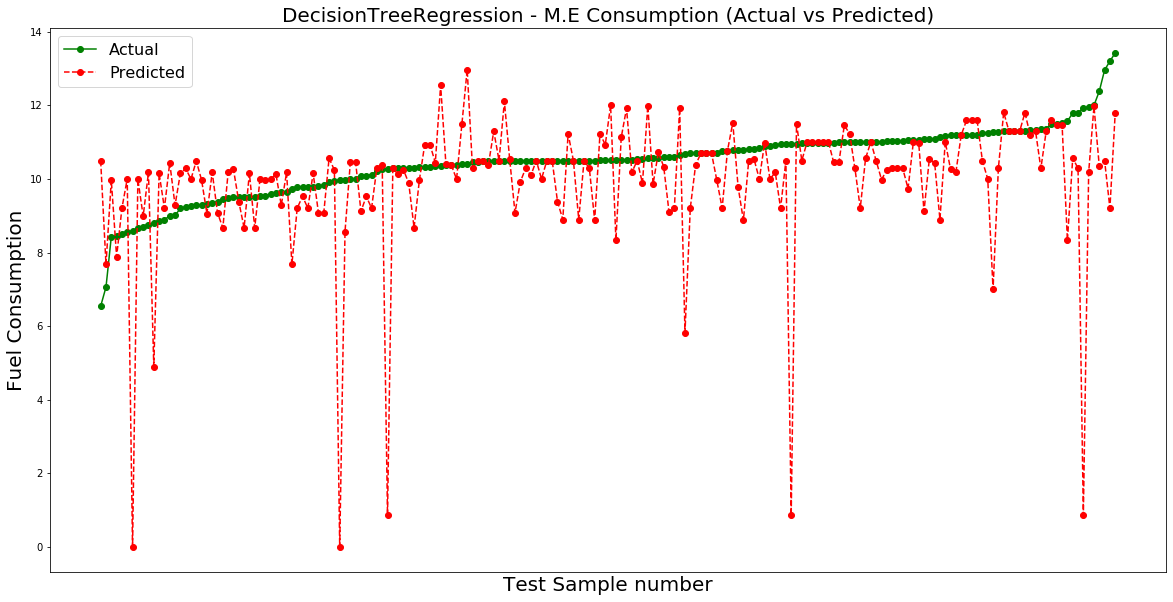

In [90]:
y_test_idx = np.argsort(y_test)

plt.figure(figsize=(20,10))
#plt.scatter(range(y_test.size), y_test, color = "red")
plt.plot(range(len(sorted_idx)), y_test.iloc[sorted_idx], '-o', color = "green", label='Actual')
plt.plot(range(len(sorted_idx)), y_pred[sorted_idx], '--o', color = "red", label='Predicted')
plt.legend(loc="upper left", fontsize=16)
plt.xticks([])
plt.title("DecisionTreeRegression - M.E Consumption (Actual vs Predicted)", fontsize=20)
plt.xlabel("Test Sample number", fontsize=20)
plt.ylabel("Fuel Consumption", fontsize=20)
plt.show()